In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima.model import ARIMA  # Import from the updated module
from datetime import datetime,timedelta
register_matplotlib_converters()

## Generate some data
# $(y)_t=50+0.40\varepsilon_(t-1)+0.3\varepsilon_(t-2)+\varepsilon_t$
## E(t) is normal distribution with mean 0 and variance 1

In [2]:
errors=np.random.normal(0,1,400)

In [3]:
date_index=pd.date_range(start='9/1/2019',end='1/1/2020')

In [4]:
mu=50
series=[]
for t in range(1,len(date_index)+1):
    series.append(mu+0.4*errors[t-1]+0.3*errors[t-2]+errors[t])

In [5]:
series=pd.Series(series,date_index)
series=series.asfreq(pd.infer_freq(series.index))

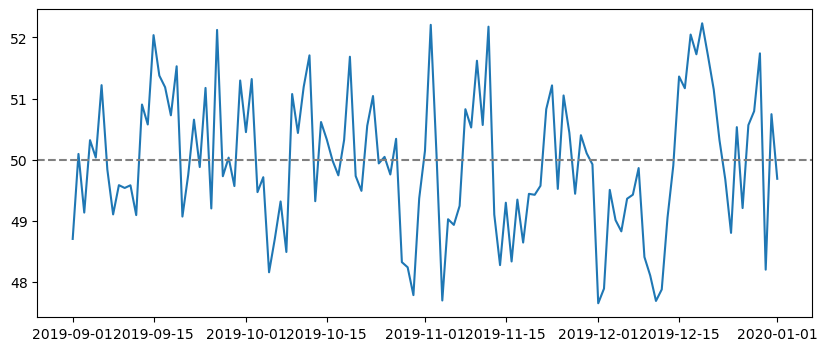

In [6]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.axhline(mu,linestyle='--',color='grey')

In [7]:
def calc_corr(series,lag):
    return pearsonr(series[:-lag],sries[lag:])[0]

## ACF

<BarContainer object of 10 artists>

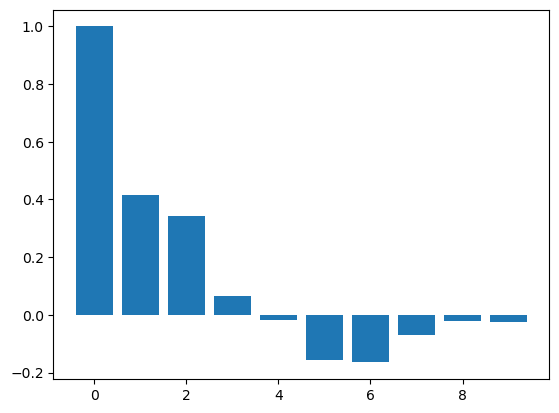

In [8]:
acf_vals=acf(series)
num_lags=10
plt.bar(range(num_lags),acf_vals[:num_lags])

## PACF

<BarContainer object of 21 artists>

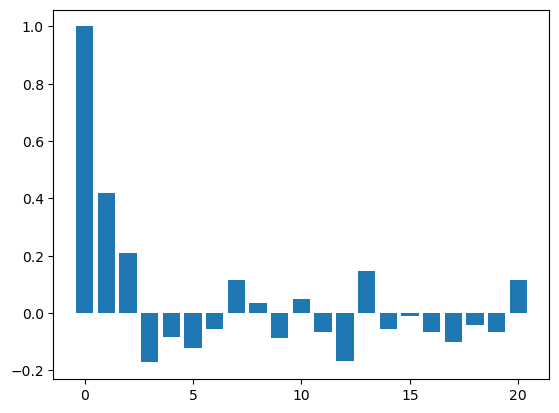

In [9]:
pacf_vals=pacf(series)
num_lags = 25
plt.bar(range(min(num_lags, len(pacf_vals))), pacf_vals[:num_lags])


## Get training and testing sets


In [10]:
train_end=datetime(2019,12,30)#training data from 2010 to 2018 last
test_end=datetime(2020,1,1)#test data from 2019 satring to 2019 ending
train_data=series[:train_end]
test_data=series[train_end+timedelta(days=1):test_end]

## Fit the AR model

In [11]:
#create the model
model=ARIMA(train_data,order=(0,0,2))

In [12]:

model_fit=model.fit()


In [13]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  121
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -171.709
Date:                Tue, 13 Aug 2024   AIC                            351.418
Time:                        18:32:25   BIC                            362.602
Sample:                    09-01-2019   HQIC                           355.960
                         - 12-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.9418      0.161    310.185      0.000      49.626      50.257
ma.L1          0.3786      0.094      4.049      0.000       0.195       0.562
ma.L2          0.3188      0.101      3.172      0.0

# predicted Model:
# $\hat(y)_t=50+0.40\varepsilon_(t-1)+0.32\varepsilon_(t-2)+\varepsilon_t$

In [14]:
#get predictions start and end dates
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [15]:
#get the predictions and residuals
predictions=model_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data-predictions

In [16]:
print(residuals.head())

2019-12-31    1.345186
2020-01-01    0.544708
Freq: D, dtype: float64


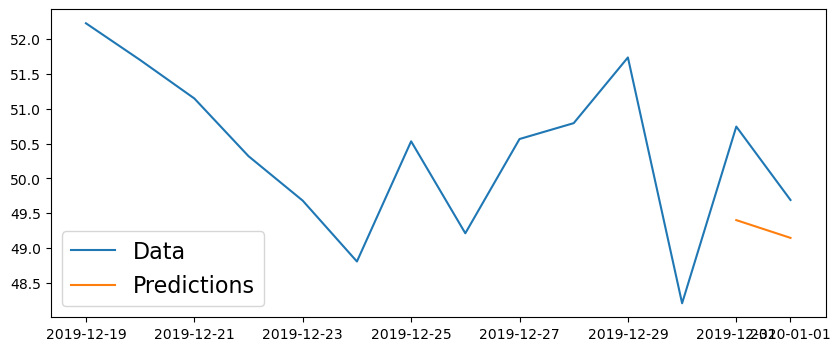

In [17]:
plt.figure(figsize=(10,4))
plt.plot(series[-14:])
plt.plot(predictions)
plt.legend(('Data','Predictions'),fontsize=16)

In [18]:
print('Mean absolute percent error:', round(np.mean(abs(residuals/test_data)),4))

Mean absolute percent error: 0.0187


In [19]:
print('Root mean sqaure Error', np.sqrt(np.mean(residuals**2)))

Root mean sqaure Error 1.026214582457204
